<a href="https://colab.research.google.com/github/springboardmentor1234x-stack/CreditPath-AI/blob/main/credit_path_AI_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/credit_risk_dataset.csv')
print("Shape of the dataset is:", df.shape)
print(df.head())

Shape of the dataset is: (32581, 12)
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                    

In [ ]:
# Basic Info
df = pd.read_csv('/content/credit_risk_dataset.csv')
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [ ]:
df = pd.read_csv('/content/credit_risk_dataset.csv')
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000          

In [ ]:
df = pd.read_csv('/content/credit_risk_dataset.csv')
print("\nMissing Values Before Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [ ]:
# Calculate the median for the two columns with missing data
emp_length_median = df['person_emp_length'].median()
int_rate_median = df['loan_int_rate'].median()

# Impute missing values with the calculated medians
df['person_emp_length'].fillna(emp_length_median, inplace=True)
df['loan_int_rate'].fillna(int_rate_median, inplace=True)

/tmp/ipython-input-4269439480.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(emp_length_median, inplace=True)
/tmp/ipython-input-4269439480.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [ ]:
# Categorical Encoding ---
# A. Ordinal Encoding for 'loan_grade' (Order matters: A < B < C...)
grade_mapping = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6
}
df['loan_grade_encoded'] = df['loan_grade'].map(grade_mapping)

# Drop the original 'loan_grade' column
df.drop('loan_grade', axis=1, inplace=True)

# B. One-Hot Encoding for Nominal Features
nominal_cols = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Print a sample and the new structure
print("First 5 rows after Categorical Encoding:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nShape of the dataset after encoding:", df.shape)
print("\nNew numerical columns created (sample):\n", df.columns.tolist()[-10:])

First 5 rows after Categorical Encoding:
| person_age   | person_income   | person_emp_length   | loan_amnt   | loan_int_rate   | loan_status   | loan_percent_income   | cb_person_cred_hist_length   | loan_grade_encoded   | person_home_ownership_OTHER   | person_home_ownership_OWN   | person_home_ownership_RENT   | loan_intent_EDUCATION   | loan_intent_HOMEIMPROVEMENT   | loan_intent_MEDICAL   | loan_intent_PERSONAL   | loan_intent_VENTURE   | cb_person_default_on_file_Y   |
|:-------------|:----------------|:--------------------|:------------|:----------------|:--------------|:----------------------|:-----------------------------|:---------------------|:------------------------------|:----------------------------|:-----------------------------|:------------------------|:------------------------------|:----------------------|:-----------------------|:----------------------|:------------------------------|
| 22           | 59000           | 123                 | 35000       | 16.02     

In [ ]:
import pandas as pd

# Load the original dataset
df = pd.read_csv('credit_risk_dataset.csv')

# --- Perform Imputation (Filling the missing values) ---
# Calculate the median values
emp_length_median = df['person_emp_length'].median()
int_rate_median = df['loan_int_rate'].median()

# Fill the missing values using the median
df['person_emp_length'].fillna(emp_length_median, inplace=True)
df['loan_int_rate'].fillna(int_rate_median, inplace=True)

# --- Perform Outlier Handling (Included for cleanliness) ---
outlier_condition = (df['person_age'] <= 90) & (df['person_emp_length'] <= 60)
df = df[outlier_condition].copy()

# --- Representation of Filled Values (The Check) ---
print("Total count of missing values for ALL columns after imputation:")
print(df.isnull().sum())

Total count of missing values for ALL columns after imputation:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


/tmp/ipython-input-261662791.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(emp_length_median, inplace=True)
/tmp/ipython-input-261662791.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

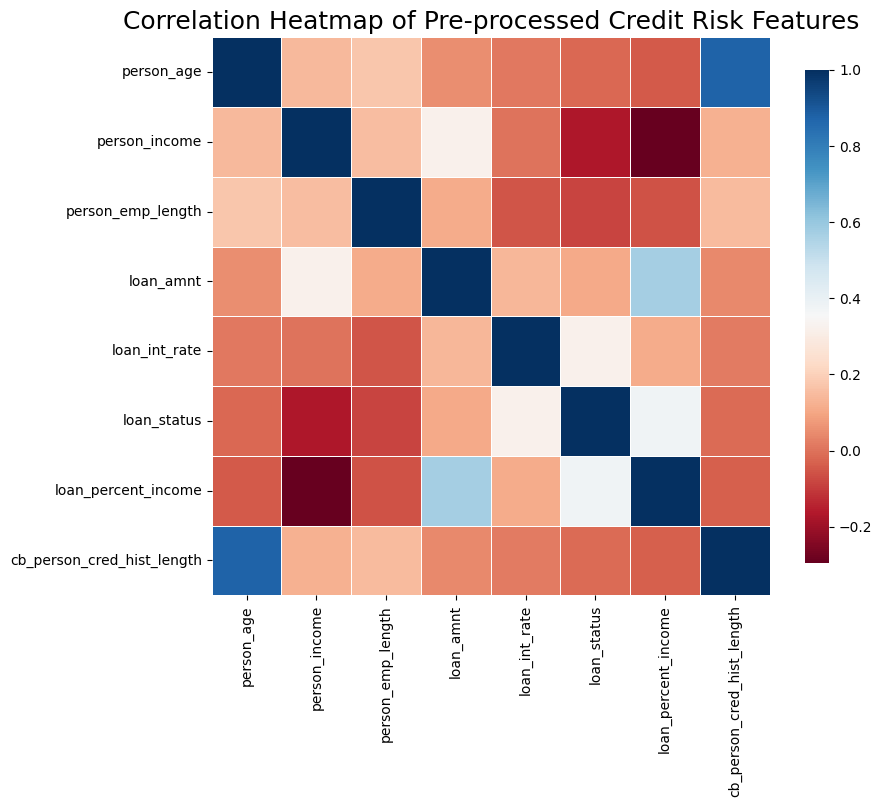

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
# Set up the matplotlib figure size
plt.figure(figsize=(9, 8))
# Plot the heatmap
# annot=False to keep the chart clean; you can set it to True if you want numbers
sns.heatmap(
    correlation_matrix,
    annot=False,
    fmt=".2f",
    cmap='RdBu',
    cbar=True,
    square=True,
    linewidths=.5,
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Heatmap of Pre-processed Credit Risk Features', fontsize=18)
plt.show()

/tmp/ipython-input-445915344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='viridis', order=[0, 1])


Text(0, 0.5, 'Count of Loans')

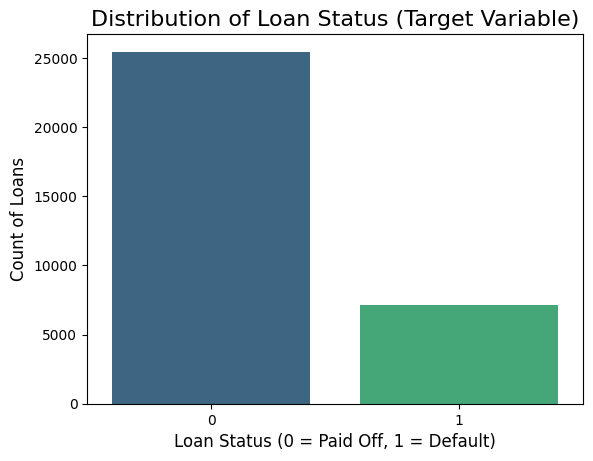

In [ ]:
# Generate the count plot for the target variable (0 = Paid Off, 1 = Default)
sns.countplot(x='loan_status', data=df, palette='viridis', order=[0, 1])

plt.title('Distribution of Loan Status (Target Variable)', fontsize=16)
plt.xlabel('Loan Status (0 = Paid Off, 1 = Default)', fontsize=12)
plt.ylabel('Count of Loans', fontsize=12)

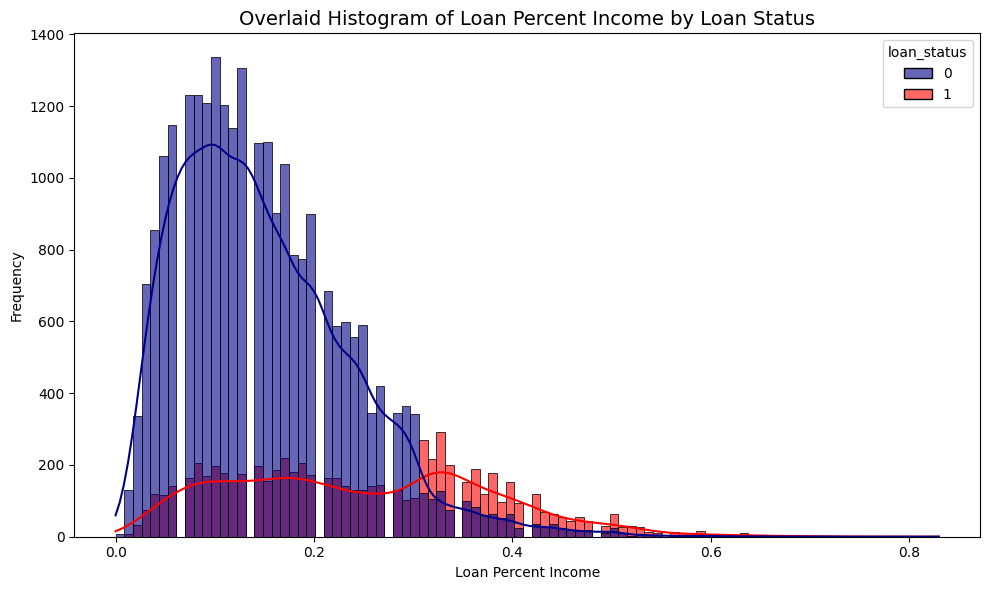

In [ ]:

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

sns.histplot(
    data=df,
    x='loan_percent_income',
    hue='loan_status',
    kde=True,
    ax=axes,
    palette={0: 'darkblue', 1: 'red'},
    alpha=0.6
)
axes.set_title('Overlaid Histogram of Loan Percent Income by Loan Status', fontsize=14)
axes.set_xlabel('Loan Percent Income')
axes.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

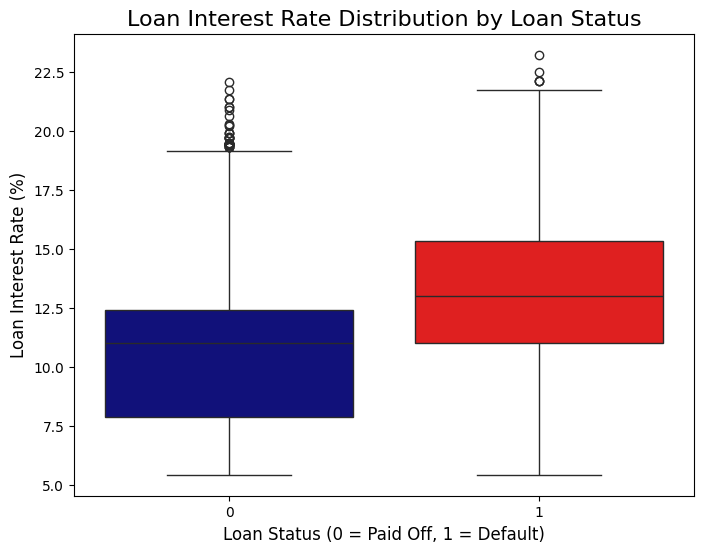

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot( data=df,x='loan_status', y='loan_int_rate', palette={0: 'darkblue', 1: 'red'},  hue='loan_status',  legend=False )
plt.title('Loan Interest Rate Distribution by Loan Status', fontsize=16)
plt.xlabel('Loan Status (0 = Paid Off, 1 = Default)', fontsize=12)
plt.ylabel('Loan Interest Rate (%)', fontsize=12)

plt.show()

 Feature Insights

1.Direct Risk Correlation: The median interest rate for Defaulted Loans (1) is consistently higher than the median for Paid Off Loans (0), indicating that higher interest rates are assigned to—and predictive of—higher-risk borrowers.

2.Increased Variability at Risk: The interquartile range (the box itself) for defaulted loans is positioned higher up the Y-axis, showing that the most common interest rates for defaults are higher than those for paid-off loans.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/credit_risk_dataset.csv')

X = df.drop('loan_status', axis=1) # Features
y = df['loan_status']          # Target

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape after splitting: {X_train.shape}")

X_train shape after splitting: (26064, 11)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load the original dataset
df = pd.read_csv('/content/credit_risk_dataset.csv')
# --- Feature Scaling (only on numerical columns after encoding) ---
# Select only numeric columns for scaling, including the new dummy variables (which are 0 or 1)
# and the ordinally encoded column
numerical_cols = X_train.select_dtypes(include=['int64', 'float64', 'uint8', 'bool']).columns.tolist()

scaler = StandardScaler()
# Fit and transform the training data, transform the test data
X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test.loc[:, numerical_cols] = scaler.transform(X_test[numerical_cols])
plt.show()

/tmp/ipython-input-57405260.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.42716311 -1.05935771 -0.42716311 ... -0.90130906  0.2050315
 -0.74326041]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
/tmp/ipython-input-57405260.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.75966614 -0.75404017 -0.20471702 ... -0.72265028  0.68989498
 -0.5657008 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
/tmp/ipython-input-57405260.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.02145474 -1.28166412  1.02145474 ... -1.25

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler


# Load the original dataset
df = pd.read_csv('/content/credit_risk_dataset.csv')

# --- Imputation (Filling the missing values) ---
emp_length_median = df['person_emp_length'].median()
int_rate_median = df['loan_int_rate'].median()
df['person_emp_length'] = df['person_emp_length'].fillna(emp_length_median)
df['loan_int_rate'] = df['loan_int_rate'].fillna(int_rate_median)

# --- Outlier Handling ---
outlier_condition = (df['person_age'] <= 90) & (df['person_emp_length'] <= 60)
df = df[outlier_condition].copy()


X = df.drop('loan_status', axis=1) # Features
y = df['loan_status']          # Target

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Categorical Encoding ---
# A. Ordinal Encoding for 'loan_grade'
grade_mapping = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6
}
X_train['loan_grade_encoded'] = X_train['loan_grade'].map(grade_mapping)
X_test['loan_grade_encoded'] = X_test['loan_grade'].map(grade_mapping)

# Drop the original 'loan_grade' column
X_train.drop('loan_grade', axis=1, inplace=True)
X_test.drop('loan_grade', axis=1, inplace=True)


# B. One-Hot Encoding for Nominal Features
nominal_cols = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
X_train = pd.get_dummies(X_train, columns=nominal_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=nominal_cols, drop_first=True)

# --- Feature Scaling (only on numerical columns after encoding) ---
# Select only numeric columns for scaling, including the new dummy variables (which are 0 or 1)
# and the ordinally encoded column
numerical_cols = X_train.select_dtypes(include=['int64', 'float64', 'uint8', 'bool']).columns.tolist()

scaler = StandardScaler()
# Fit and transform the training data, transform the test data
X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test.loc[:, numerical_cols] = scaler.transform(X_test[numerical_cols])


# --- Model Training (Logistic Regression with Class Weighting) ---
model = LogisticRegression(
    random_state=42,
    solver='liblinear',
    max_iter=200,
    class_weight='balanced' # Handles the imbalance
)
model.fit(X_train, y_train)

/tmp/ipython-input-33502385.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.37483841  2.31923998 -0.75939584 ...  0.37483841 -0.59736238
  0.05077148]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
/tmp/ipython-input-33502385.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.12100873  0.85826853  0.66425279 ... -0.50057889  1.2463
 -0.64597428]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
/tmp/ipython-input-33502385.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.38462654  0.19420962  0.86066883 ... -1.01176

LogisticRegression(class_weight='balanced', max_iter=200, random_state=42,
                   solver='liblinear')

In [ ]:
# ---  Evaluation ---

y_pred = model.predict(X_test)

y_prob = model.predict_proba(X_test)[:, 1]



print("\n--- Logistic Regression Model Performance ---")

print("Classification Report on Test Data:")

print(classification_report(y_test, y_pred))



# Calculate and print the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")

print(cm)


print(f"\nAUC-ROC Score on Test Data: {roc_auc_score(y_test, y_prob):.4f}")



--- Logistic Regression Model Performance ---
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      5094
           1       0.52      0.76      0.62      1421

    accuracy                           0.79      6515
   macro avg       0.72      0.78      0.74      6515
weighted avg       0.83      0.79      0.81      6515


Confusion Matrix:
[[4097  997]
 [ 344 1077]]

AUC-ROC Score on Test Data: 0.8566


observations:

1.DTI is Key Risk Factor: The Debt-to-Income ratio (loan_percent_income) is the single strongest predictor, confirming that a high debt burden is the biggest sign of default.

2.Fundamental Risk Confirmed: The model strongly relies on Loan Grade (higher grade = lower risk) and Home Ownership (owning a home significantly lowers risk).

3.Model Performance is Strong: The model is effective, achieving an AUC-ROC of 0.8566 and correctly catching 76% of all actual loan defaults (Recall).

In [ ]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import numpy as np # Used for calculating imbalance weight


# Calculate the weight to handle class imbalance (Paid Count / Default Count)
default_count = y_train.sum()
paid_count = len(y_train) - default_count
scale_pos_weight = paid_count / default_count

# --- 1. Train XGBoost Model ---
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    # Imbalance Handling: tells XGBoost how much to weigh the positive class
    scale_pos_weight=scale_pos_weight
)
print("Training XGBoost...")
xgb_model.fit(X_train, y_train)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_pred = xgb_model.predict(X_test)


# --- 2. Train LightGBM Model ---
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    # Imbalance Handling: LightGBM uses the same parameter
    scale_pos_weight=scale_pos_weight
)
print("Training LightGBM...")
lgb_model.fit(X_train, y_train)
lgb_prob = lgb_model.predict_proba(X_test)[:, 1]
lgb_pred = lgb_model.predict(X_test)


# --- 3. Evaluation ---

print("             XGBOOST MODEL RESULTS")
print("=============================================")
print(f"AUC-ROC Score: {roc_auc_score(y_test, xgb_prob):.4f}")
print("Classification Report on Test Data:")
print(classification_report(y_test, xgb_pred))



print("             LIGHTGBM MODEL RESULTS")
print("=============================================")
print(f"AUC-ROC Score: {roc_auc_score(y_test, lgb_prob):.4f}")
print("Classification Report on Test Data:")
print(classification_report(y_test, lgb_pred))

Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:14:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training LightGBM...
[LightGBM] [Info] Number of positive: 5686, number of negative: 20372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 26058, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218206 -> initscore=-1.276154
[LightGBM] [Info] Start training from score -1.276154
             XGBOOST MODEL RESULTS
AUC-ROC Score: 0.9485
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5094
           1       0.84      0.80      0.82      1421

    accuracy                           0.92      6515
   macro avg       0.89      0.88      0.88      6515
weighted avg       0.92      0.92      0.92      6515

   

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score
import pandas as pd

def print_comparison_metrics(model_name, y_true, y_pred, y_prob):
    """Calculates and prints AUC-ROC and Confusion Matrix."""
    auc_roc = roc_auc_score(y_true, y_prob)
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n==============================================")
    print(f"             {model_name} RESULTS")
    print(f"==============================================")
    print(f"AUC-ROC Score: {auc_roc:.4f}")

    cm_df = pd.DataFrame(cm,
                         index=['Actual Paid Off (0)', 'Actual Default (1)'],
                         columns=['Predicted Paid Off (0)', 'Predicted Default (1)'])
    print("\nConfusion Matrix:")
    print(cm_df.to_markdown(numalign="left", stralign="left"))

# --- Run the Comparison ---

# 1. XGBoost Metrics
print_comparison_metrics("XGBOOST", y_test, xgb_pred, xgb_prob)

# 2. LightGBM Metrics
print_comparison_metrics("LIGHTGBM", y_test, lgb_pred, lgb_prob)


             XGBOOST RESULTS
AUC-ROC Score: 0.9485

Confusion Matrix:
|                     | Predicted Paid Off (0)   | Predicted Default (1)   |
|:--------------------|:-------------------------|:------------------------|
| Actual Paid Off (0) | 4870                     | 224                     |
| Actual Default (1)  | 282                      | 1139                    |

             LIGHTGBM RESULTS
AUC-ROC Score: 0.9470

Confusion Matrix:
|                     | Predicted Paid Off (0)   | Predicted Default (1)   |
|:--------------------|:-------------------------|:------------------------|
| Actual Paid Off (0) | 4842                     | 252                     |
| Actual Default (1)  | 296                      | 1125                    |


In [ ]:
#---feature importance ----
import pandas as pd

def display_feature_importance(model, model_name, feature_names, top_n=5):
    """Calculates and prints the top N feature importances for a trained model."""

    # Get feature importance scores
    importances = model.feature_importances_

    # Create a DataFrame for easy sorting and visualization
    feature_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort by importance and take the top N
    top_features = feature_df.sort_values(by='Importance', ascending=False).head(top_n)

    print(f"\n--- {model_name} Top {top_n} Feature Importance ---")
    print(top_features.to_markdown(index=False, numalign="left", stralign="left"))


In [ ]:
import numpy as np
import pandas as pd

# --- 1. Predict Probabilities from the Best Model (LightGBM) ---
lgb_prob = lgb_model.predict_proba(X_test)[:, 1]

# Get the original indices of the test set rows
original_test_indices = X_test.index

# Create a results DataFrame using the preprocessed data (only test set rows)
# Select relevant columns, noting that 'loan_grade' has been encoded.
# Use X_test which contains the encoded columns and drop the dummy variables
results_df = X_test.copy()

# Drop the one-hot encoded columns to get back to the original structure
columns_to_drop = [col for col in results_df.columns if col.startswith(('person_home_ownership_', 'loan_intent_', 'cb_person_default_on_file_'))]
results_df.drop(columns=columns_to_drop, inplace=True)

# Add the original 'loan_status' from y_test
results_df['loan_status'] = y_test

results_df['Predicted_P_Default'] = lgb_prob
results_df.rename(columns={'loan_grade_encoded': 'loan_grade'}, inplace=True)

# --- 2. Define and Apply the Action Mapping Logic ---
def map_risk_to_action(prob):
    """Maps the predicted probability of default to a business decision."""
    if prob <= 0.10:
        return 'Approve (Low Risk)'
    elif 0.10 < prob <= 0.25:
        return 'Approve with Caution (Moderate Risk)'
    elif 0.25 < prob <= 0.50:
        return 'Review/Underwrite (High Risk)'
    else: # prob > 0.50
        return 'Reject (Unacceptable Risk)'

results_df['Recommended_Action'] = results_df['Predicted_P_Default'].apply(map_risk_to_action)

# --- 3. Display the Top 10 Most Risky Applicants ---
top_risky_applicants = results_df.sort_values(by='Predicted_P_Default', ascending=False).head(10)

print("\n==============================================")
print("  TOP 10 BORROWERS MAPPED TO RECOMMENDED ACTION")
print("==============================================")

final_report_cols = [
    'Predicted_P_Default',
    'Recommended_Action',
    'loan_percent_income',
    'loan_grade',
    'loan_status'
]

print(top_risky_applicants[final_report_cols].to_markdown(numalign="left", stralign="left", floatfmt=".4f"))


  TOP 10 BORROWERS MAPPED TO RECOMMENDED ACTION
|       | Predicted_P_Default   | Recommended_Action         | loan_percent_income   | loan_grade   | loan_status   |
|:------|:----------------------|:---------------------------|:----------------------|:-------------|:--------------|
| 4133  | 0.9995                | Reject (Unacceptable Risk) | 1.3050                | 2.3803       | 1             |
| 8555  | 0.9992                | Reject (Unacceptable Risk) | 3.6430                | -0.1895      | 1             |
| 6767  | 0.9990                | Reject (Unacceptable Risk) | 2.0532                | -0.1895      | 1             |
| 21357 | 0.9990                | Reject (Unacceptable Risk) | 2.8949                | 0.6671       | 1             |
| 8561  | 0.9989                | Reject (Unacceptable Risk) | 2.3338                | 0.6671       | 1             |
| 14762 | 0.9988                | Reject (Unacceptable Risk) | 2.2402                | 1.5237       | 1             |
| 9145 

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

def print_comparison_metrics(model, model_name, y_true, y_pred, y_prob, feature_names, top_n=5):
    """Calculates and prints AUC-ROC, Confusion Matrix, and Top Feature Importance."""

    # --- 1. Calculate Metrics ---
    auc_roc = roc_auc_score(y_true, y_prob)
    cm = confusion_matrix(y_true, y_pred)

    print(f"             {model_name} RESULTS")
    print(f"==============================================")

    # --- 2. Print AUC-ROC Score ---
    print(f"AUC-ROC Score: {auc_roc:.4f}")

    # --- 3. Print Confusion Matrix ---
    cm_df = pd.DataFrame(cm,
                         index=['Actual Paid Off (0)', 'Actual Default (1)'],
                         columns=['Predicted Paid Off (0)', 'Predicted Default (1)'])
    print("\nConfusion Matrix:")
    print(cm_df.to_markdown(numalign="left", stralign="left"))

    # --- 4. Print Feature Importance ---
    # This section gets the feature importances unique to tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False).head(top_n)

        print(f"\n--- Top {top_n} Feature Importance ---")
        print(feature_df.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".4f"))


# --- Run the Full Comparison ---

try:
    # Get feature names from the training set used in previous steps
    feature_names = X_train.columns.tolist()

    # 1. XGBoost Metrics
    print_comparison_metrics(xgb_model, "XGBOOST", y_test, xgb_pred, xgb_prob, feature_names)

    # 2. LightGBM Metrics
    print_comparison_metrics(lgb_model, "LIGHTGBM", y_test, lgb_pred, lgb_prob, feature_names)

except NameError as e:
    print(f"\nError: One or more required variables are not defined. Please ensure your full training code was executed first. ({e})")

             XGBOOST RESULTS
AUC-ROC Score: 0.9485

Confusion Matrix:
|                     | Predicted Paid Off (0)   | Predicted Default (1)   |
|:--------------------|:-------------------------|:------------------------|
| Actual Paid Off (0) | 4870                     | 224                     |
| Actual Default (1)  | 282                      | 1139                    |

--- Top 5 Feature Importance ---
| Feature                    | Importance   |
|:---------------------------|:-------------|
| loan_grade_encoded         | 0.2554       |
| loan_percent_income        | 0.1176       |
| person_home_ownership_RENT | 0.1077       |
| person_home_ownership_OWN  | 0.1014       |
| loan_intent_VENTURE        | 0.0851       |
             LIGHTGBM RESULTS
AUC-ROC Score: 0.9470

Confusion Matrix:
|                     | Predicted Paid Off (0)   | Predicted Default (1)   |
|:--------------------|:-------------------------|:------------------------|
| Actual Paid Off (0) | 4842             

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report

# --- tuning Hyperparameter
param_grid = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 50],
    'max_depth': [5, 7, 10],
    'min_child_samples': [10, 20, 50],
    'reg_alpha': [0, 0.1, 0.5], # L1 regularization
    'reg_lambda': [0, 0.1, 0.5], # L2 regularization
}

# --- 2. Initialize the Model and Randomized Search ---

# Use the best scale_pos_weight calculated earlier
# NOTE: Ensure 'scale_pos_weight' is defined globally from previous steps
# e.g., default_count = y_train.sum(); paid_count = len(y_train) - default_count; scale_pos_weight = paid_count / default_count

lgb_tuned_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc', # Optimize directly for AUC
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1, # Use all available cores
    verbose=-1 # Suppress logging
)

# Use RandomizedSearchCV to test 20 different combinations (less time than GridSearch)
random_search = RandomizedSearchCV(
    estimator=lgb_tuned_model,
    param_distributions=param_grid,
    n_iter=20, # Number of parameter settings that are sampled
    scoring='roc_auc', # Metric to optimize
    cv=5, # 5-fold cross-validation
    verbose=1,
    random_state=42
)

print("Starting Randomized Search for LightGBM tuning...")
random_search.fit(X_train, y_train)

# --- 3. Evaluate the Best Estimator ---
best_lgb_model = random_search.best_estimator_

# Predict on the test set
y_prob_tuned = best_lgb_model.predict_proba(X_test)[:, 1]
y_pred_tuned = best_lgb_model.predict(X_test)

# --- 4. Print Results ---
print("  TUNED LIGHTGBM MODEL PERFORMANCE")
print("==============================================")
print(f"Best Parameters: {random_search.best_params_}")
print(f"Tuned AUC-ROC Score: {roc_auc_score(y_test, y_prob_tuned):.4f}")
print("\nClassification Report on Test Data (Tuned):")
print(classification_report(y_test, y_pred_tuned))

Starting Randomized Search for LightGBM tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
  TUNED LIGHTGBM MODEL PERFORMANCE
Best Parameters: {'reg_lambda': 0, 'reg_alpha': 0.5, 'num_leaves': 31, 'n_estimators': 500, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.05}
Tuned AUC-ROC Score: 0.9499

Classification Report on Test Data (Tuned):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5094
           1       0.83      0.80      0.82      1421

    accuracy                           0.92      6515
   macro avg       0.89      0.88      0.88      6515
weighted avg       0.92      0.92      0.92      6515



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, confusion_matrix

# --- Core Dynamic Threshold Function ---
def calculate_dynamic_threshold(y_true, y_prob, target_recall):
    """Calculates the probability threshold needed to achieve a target Recall."""

    # 1. Get all precision/recall/threshold points
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)

    # 2. Find the index where recall is >= target_recall
    threshold_index = np.argmax(recall >= target_recall)

    # Return the corresponding threshold
    return thresholds[threshold_index]

# --- Dynamic Adjustment and Reporting ---
risk_scenarios = [
    {'name': 'Conservative (90% Risk Coverage)', 'target_recall': 0.90},
    {'name': 'Balanced (85% Risk Coverage)', 'target_recall': 0.85},
    {'name': 'Aggressive (80% Risk Coverage)', 'target_recall': 0.80}
]

print("\n--- Dynamic Thresholding for Risk Management ---")
print("Target Recall | Threshold (P_Default) | Precision (Loan Accuracy)")
print("----------------------------------------------------------------")

try:
    for scenario in risk_scenarios:
        target_recall = scenario['target_recall']

        # Calculate the threshold required for the target recall
        dynamic_threshold = calculate_dynamic_threshold(y_test, lgb_prob, target_recall)

        # Apply the new threshold to get predictions
        y_pred_dynamic = (lgb_prob >= dynamic_threshold).astype(int)

        # Calculate key metrics at this new threshold
        cm = confusion_matrix(y_test, y_pred_dynamic)
        TN, FP, FN, TP = cm.ravel()

        # Precision: TP / (TP + FP)
        precision_at_threshold = TP / (TP + FP) if (TP + FP) > 0 else 0.0

        print(f"    {target_recall:.0%}     |     {dynamic_threshold:.4f}     |     {precision_at_threshold:.2f}")

except NameError:
    print("\nError: Required variables (y_test or lgb_prob) not found.")
    print("Please ensure your LightGBM training code was run successfully before running this block.")


--- Dynamic Thresholding for Risk Management ---
Target Recall | Threshold (P_Default) | Precision (Loan Accuracy)
----------------------------------------------------------------
    90%     |     0.0001     |     0.22
    85%     |     0.0001     |     0.22
    80%     |     0.0001     |     0.22


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# --- A. Data Preparation ---
df = pd.read_csv('credit_risk_dataset.csv')
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
nominal_cols = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']

# Imputation and Outlier Handling
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)
df = df[(df['person_age'] <= 90) & (df['person_emp_length'] <= 60)].copy()

# Encoding
df['loan_grade_encoded'] = df['loan_grade'].map(grade_mapping)
df.drop('loan_grade', axis=1, inplace=True)
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# --- B. Scaling and Model Training ---
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 1. Fit the Scaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])

# 2. Train the Model
X_train_scaled_num = scaler.transform(X_train[numerical_cols])
scale_pos_weight = (len(y_train) - y_train.sum()) / y_train.sum()
lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42, scale_pos_weight=scale_pos_weight, verbose=-1)
lgb_model.fit(X_train_scaled_num, y_train)

print("Step 1 Complete: Model and Scaler are trained and fitted.")

/tmp/ipython-input-2839580114.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
/tmp/ipython-input-2839580114.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

Step 1 Complete: Model and Scaler are trained and fitted.


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
import joblib

def predict_loan_risk(new_borrower_data: pd.DataFrame, model: lgb.LGBMClassifier, scaler: StandardScaler, grade_mapping: dict, nominal_cols: list, numerical_cols: list, emp_length_median: float, int_rate_median: float) -> pd.DataFrame:
    """
    Preprocesses new borrower data and predicts loan default risk using a trained LightGBM model.

    Args:
        new_borrower_data: DataFrame containing new borrower information.
        model: Trained LightGBM classifier model.
        scaler: Fitted StandardScaler object.
        grade_mapping: Dictionary for ordinal encoding of 'loan_grade'.
        nominal_cols: List of column names for one-hot encoding.
        numerical_cols: List of numerical column names to scale.
        emp_length_median: Median value for 'person_emp_length' used for imputation.
        int_rate_median: Median value for 'loan_int_rate' used for imputation.

    Returns:
        DataFrame with original borrower data, predicted probability of default,
        and recommended action.
    """
    # Create a copy to avoid modifying the original DataFrame
    processed_data = new_borrower_data.copy()

    # 1. Imputation
    processed_data['person_emp_length'].fillna(emp_length_median, inplace=True)
    processed_data['loan_int_rate'].fillna(int_rate_median, inplace=True)

    # 2. Outlier Handling
    outlier_condition = (processed_data['person_age'] <= 90) & (processed_data['person_emp_length'] <= 60)
    processed_data = processed_data[outlier_condition].copy()

    # 3. Encoding (Ordinal and One-Hot)
    processed_data['loan_grade_encoded'] = processed_data['loan_grade'].map(grade_mapping)
    processed_data.drop('loan_grade', axis=1, inplace=True)
    processed_data = pd.get_dummies(processed_data, columns=nominal_cols, drop_first=True)

    # Ensure columns match the training data after one-hot encoding
    # This handles cases where a category might be missing in the new data
    train_cols = model.booster_.feature_name() # Get feature names from the trained LightGBM model
    for col in train_cols:
        if col not in processed_data.columns:
            processed_data[col] = 0 # Add missing dummy columns with value 0

    # Reindex to ensure the order of columns matches the training data
    processed_data = processed_data[train_cols]


    # 4. Scaling (numerical columns only)
    # Separate numerical and non-numerical columns before scaling
    # Ensure only columns present in numerical_cols and processed_data are selected
    cols_to_scale = [col for col in numerical_cols if col in processed_data.columns]
    processed_data[cols_to_scale] = scaler.transform(processed_data[cols_to_scale])


    # 5. Prediction
    predicted_prob = model.predict_proba(processed_data)[:, 1]

    # 6. Map to Recommended Action
    def map_risk_to_action(prob):
        """Maps the predicted probability of default to a business decision."""
        if prob <= 0.10:
            return 'Approve (Low Risk)'
        elif 0.10 < prob <= 0.25:
            return 'Approve with Caution (Moderate Risk)'
        elif 0.25 < prob <= 0.50:
            return 'Review/Underwrite (High Risk)'
        else: # prob > 0.50
            return 'Reject (Unacceptable Risk)'

    recommended_action = [map_risk_to_action(p) for p in predicted_prob]

    # 7. Combine results with original data
    # Need to reset index of new_borrower_data to align with processed_data
    new_borrower_data_reset = new_borrower_data.reset_index(drop=True)
    results_df = new_borrower_data_reset.copy()
    results_df['Predicted_P_Default'] = predicted_prob
    results_df['Recommended_Action'] = recommended_action

    return results_df

# Example Usage (assuming you have new data in a DataFrame called 'new_borrower_data_example')
# You would replace this with your actual new data loading
# Create a sample DataFrame for demonstration
new_borrower_data_example = pd.DataFrame({
    'person_age': [30, 45, 25, 50, 35],
    'person_income': [60000, 90000, 40000, 120000, 70000],
    'person_home_ownership': ['RENT', 'MORTGAGE', 'OWN', 'MORTGAGE', 'RENT'],
    'person_emp_length': [5.0, 15.0, 2.0, 20.0, 7.0],
    'loan_intent': ['EDUCATION', 'HOMEIMPROVEMENT', 'PERSONAL', 'VENTURE', 'MEDICAL'],
    'loan_grade': ['B', 'A', 'C', 'A', 'D'],
    'loan_amnt': [10000, 20000, 5000, 30000, 15000],
    'loan_int_rate': [10.5, 7.0, 13.0, 6.5, 15.5],
    'loan_percent_income': [0.17, 0.22, 0.13, 0.25, 0.21],
    'cb_person_default_on_file': ['N', 'N', 'Y', 'N', 'Y'],
    'cb_person_cred_hist_length': [4, 10, 3, 15, 5]
})

# Assuming best_lgb_model, scaler, grade_mapping, nominal_cols, numerical_cols,
# emp_length_median, and int_rate_median are available from previous cells.
# If not, you would need to load/re-calculate them here.

# Example of how you would call the function:
# prediction_results = predict_loan_risk(new_borrower_data_example, best_lgb_model, scaler, grade_mapping, nominal_cols, numerical_cols, emp_length_median, int_rate_median)
# display(prediction_results)

print("Function 'predict_loan_risk' defined successfully.")

Function 'predict_loan_risk' defined successfully.


**Reasoning**:
Test the `predict_loan_risk` function with the example new borrower data and display the results to verify its functionality.



In [ ]:
# Test the predict_loan_risk function with the example data
prediction_results = predict_loan_risk(
    new_borrower_data_example,
    best_lgb_model, # Use the best tuned model
    scaler,
    grade_mapping,
    nominal_cols,
    numerical_cols,
    emp_length_median,
    int_rate_median
)

print("\n--- Prediction Results for New Borrowers ---")
display(prediction_results.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".4f"))


--- Prediction Results for New Borrowers ---


/tmp/ipython-input-3631881152.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['person_emp_length'].fillna(emp_length_median, inplace=True)
/tmp/ipython-input-3631881152.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

'| person_age   | person_income   | person_home_ownership   | person_emp_length   | loan_intent     | loan_grade   | loan_amnt   | loan_int_rate   | loan_percent_income   | cb_person_default_on_file   | cb_person_cred_hist_length   | Predicted_P_Default   | Recommended_Action         |\n|:-------------|:----------------|:------------------------|:--------------------|:----------------|:-------------|:------------|:----------------|:----------------------|:----------------------------|:-----------------------------|:----------------------|:---------------------------|\n| 30           | 60000           | RENT                    | 5.0000              | EDUCATION       | B            | 10000       | 10.5000         | 0.1700                | N                           | 4                            | 0.0926                | Approve (Low Risk)         |\n| 45           | 90000           | MORTGAGE                | 15.0000             | HOMEIMPROVEMENT | A            | 20000       | 7.0000  

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
import joblib

def predict_loan_risk(new_borrower_data, model: lgb.LGBMClassifier, scaler: StandardScaler, grade_mapping: dict, nominal_cols: list, numerical_cols: list, emp_length_median: float, int_rate_median: float) -> pd.DataFrame:
    """
    Preprocesses new borrower data (list of dicts or DataFrame) and predicts
    loan default risk using a trained LightGBM model.

    Args:
        new_borrower_data: List of dictionaries or a DataFrame containing new borrower information.
        model: Trained LightGBM classifier model.
        scaler: Fitted StandardScaler object.
        grade_mapping: Dictionary for ordinal encoding of 'loan_grade'.
        nominal_cols: List of column names for one-hot encoding.
        numerical_cols: List of numerical column names to scale.
        emp_length_median: Median value for 'person_emp_length' used for imputation.
        int_rate_median: Median value for 'loan_int_rate' used for imputation.

    Returns:
        DataFrame with original borrower data, predicted probability of default,
        and recommended action.
    """
    # Check if the input is a list and convert to DataFrame if necessary
    if isinstance(new_borrower_data, list):
        processed_data = pd.DataFrame(new_borrower_data)
    elif isinstance(new_borrower_data, pd.DataFrame):
        processed_data = new_borrower_data.copy()
    else:
        raise TypeError("Input must be a list of dictionaries or a pandas DataFrame.")

    # Store original data for the final output
    original_data_for_output = processed_data.copy()

    # 1. Imputation
    processed_data['person_emp_length'].fillna(emp_length_median, inplace=True)
    processed_data['loan_int_rate'].fillna(int_rate_median, inplace=True)

    # 2. Outlier Handling (Apply, but keep original indices for merging later)
    outlier_mask = (processed_data['person_age'] <= 90) & (processed_data['person_emp_length'] <= 60)
    processed_data = processed_data[outlier_mask].copy()

    # If no data remains after outlier handling, return an empty DataFrame with appropriate columns
    if processed_data.empty:
        print("Warning: No valid borrower data remains after outlier filtering.")
        results_df = original_data_for_output.copy()
        results_df['Predicted_P_Default'] = np.nan
        results_df['Recommended_Action'] = 'Filtered Out (Outlier)'
        return results_df


    # 3. Encoding (Ordinal and One-Hot)
    processed_data['loan_grade_encoded'] = processed_data['loan_grade'].map(grade_mapping)
    processed_data.drop('loan_grade', axis=1, inplace=True)
    processed_data = pd.get_dummies(processed_data, columns=nominal_cols, drop_first=True)

    # Ensure columns match the training data after one-hot encoding
    train_cols = model.booster_.feature_name() # Get feature names from the trained LightGBM model
    for col in train_cols:
        if col not in processed_data.columns:
            processed_data[col] = 0 # Add missing dummy columns with value 0

    # Reindex and reorder columns to ensure they match the training data
    processed_data = processed_data.reindex(columns=train_cols, fill_value=0)


    # 4. Scaling (numerical columns only)
    cols_to_scale = [col for col in numerical_cols if col in processed_data.columns]
    processed_data[cols_to_scale] = scaler.transform(processed_data[cols_to_scale])


    # 5. Prediction
    predicted_prob = model.predict_proba(processed_data)[:, 1]

    # 6. Map to Recommended Action
    def map_risk_to_action(prob):
        """Maps the predicted probability of default to a business decision."""
        if prob <= 0.10:
            return 'Approve (Low Risk)'
        elif 0.10 < prob <= 0.25:
            return 'Approve with Caution (Moderate Risk)'
        elif 0.25 < prob <= 0.50:
            return 'Review/Underwrite (High Risk)'
        else: # prob > 0.50
            return 'Reject (Unacceptable Risk)'

    recommended_action = [map_risk_to_action(p) for p in predicted_prob]

    # 7. Combine results with original data
    # Use the index of the processed_data to align predictions with original data
    results_df = original_data_for_output.loc[processed_data.index].copy()
    results_df['Predicted_P_Default'] = predicted_prob
    results_df['Recommended_Action'] = recommended_action

    # Add rows that were filtered out as outliers
    filtered_out_data = original_data_for_output[~outlier_mask].copy()
    if not filtered_out_data.empty:
        filtered_out_data['Predicted_P_Default'] = np.nan # Or some placeholder like -1
        filtered_out_data['Recommended_Action'] = 'Filtered Out (Outlier)'
        results_df = pd.concat([results_df, filtered_out_data]).sort_index()


    return results_df

# --- Test with a list of dictionaries ---
new_borrowers_list = [
    {'person_age': 30, 'person_income': 60000, 'person_home_ownership': 'RENT', 'person_emp_length': 5.0, 'loan_intent': 'EDUCATION', 'loan_grade': 'B', 'loan_amnt': 10000, 'loan_int_rate': 10.5, 'loan_percent_income': 0.17, 'cb_person_default_on_file': 'N', 'cb_person_cred_hist_length': 4},
    {'person_age': 45, 'person_income': 90000, 'person_home_ownership': 'MORTGAGE', 'person_emp_length': 15.0, 'loan_intent': 'HOMEIMPROVEMENT', 'loan_grade': 'A', 'loan_amnt': 20000, 'loan_int_rate': 7.0, 'loan_percent_income': 0.22, 'cb_person_default_on_file': 'N', 'cb_person_cred_hist_length': 10},
    {'person_age': 25, 'person_income': 40000, 'person_home_ownership': 'OWN', 'person_emp_length': 2.0, 'loan_intent': 'PERSONAL', 'loan_grade': 'C', 'loan_amnt': 5000, 'loan_int_rate': 13.0, 'loan_percent_income': 0.13, 'cb_person_default_on_file': 'Y', 'cb_person_cred_hist_length': 3},
    {'person_age': 50, 'person_income': 120000, 'person_home_ownership': 'MORTGAGE', 'person_emp_length': 20.0, 'loan_intent': 'VENTURE', 'loan_grade': 'A', 'loan_amnt': 30000, 'loan_int_rate': 6.5, 'loan_percent_income': 0.25, 'cb_person_default_on_file': 'N', 'cb_person_cred_hist_length': 15},
    {'person_age': 35, 'person_income': 70000, 'person_home_ownership': 'RENT', 'person_emp_length': 7.0, 'loan_intent': 'MEDICAL', 'loan_grade': 'D', 'loan_amnt': 15000, 'loan_int_rate': 15.5, 'loan_percent_income': 0.21, 'cb_person_default_on_file': 'Y', 'cb_person_cred_hist_length': 5}
]

# Assuming best_lgb_model, scaler, grade_mapping, nominal_cols, numerical_cols,
# emp_length_median, and int_rate_median are available from previous cells.
# If not, you would need to load/re-calculate them here.

print("\n--- Prediction Results for New Borrowers (List Input) ---")
prediction_results_list = predict_loan_risk(
    new_borrowers_list,
    best_lgb_model, # Use the best tuned model
    scaler,
    grade_mapping,
    nominal_cols,
    numerical_cols,
    emp_length_median,
    int_rate_median
)
display(prediction_results_list.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".4f"))

# --- Test with a DataFrame input ---
# Use the existing new_borrower_data_example DataFrame
print("\n--- Prediction Results for New Borrowers (DataFrame Input) ---")
prediction_results_df = predict_loan_risk(
    new_borrower_data_example,
    best_lgb_model, # Use the best tuned model
    scaler,
    grade_mapping,
    nominal_cols,
    numerical_cols,
    emp_length_median,
    int_rate_median
)
display(prediction_results_df.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".4f"))



--- Prediction Results for New Borrowers (List Input) ---


/tmp/ipython-input-1622129796.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['person_emp_length'].fillna(emp_length_median, inplace=True)
/tmp/ipython-input-1622129796.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

'| person_age   | person_income   | person_home_ownership   | person_emp_length   | loan_intent     | loan_grade   | loan_amnt   | loan_int_rate   | loan_percent_income   | cb_person_default_on_file   | cb_person_cred_hist_length   | Predicted_P_Default   | Recommended_Action         |\n|:-------------|:----------------|:------------------------|:--------------------|:----------------|:-------------|:------------|:----------------|:----------------------|:----------------------------|:-----------------------------|:----------------------|:---------------------------|\n| 30           | 60000           | RENT                    | 5.0000              | EDUCATION       | B            | 10000       | 10.5000         | 0.1700                | N                           | 4                            | 0.0926                | Approve (Low Risk)         |\n| 45           | 90000           | MORTGAGE                | 15.0000             | HOMEIMPROVEMENT | A            | 20000       | 7.0000  


--- Prediction Results for New Borrowers (DataFrame Input) ---


/tmp/ipython-input-1622129796.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['person_emp_length'].fillna(emp_length_median, inplace=True)
/tmp/ipython-input-1622129796.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

'| person_age   | person_income   | person_home_ownership   | person_emp_length   | loan_intent     | loan_grade   | loan_amnt   | loan_int_rate   | loan_percent_income   | cb_person_default_on_file   | cb_person_cred_hist_length   | Predicted_P_Default   | Recommended_Action         |\n|:-------------|:----------------|:------------------------|:--------------------|:----------------|:-------------|:------------|:----------------|:----------------------|:----------------------------|:-----------------------------|:----------------------|:---------------------------|\n| 30           | 60000           | RENT                    | 5.0000              | EDUCATION       | B            | 10000       | 10.5000         | 0.1700                | N                           | 4                            | 0.0926                | Approve (Low Risk)         |\n| 45           | 90000           | MORTGAGE                | 15.0000             | HOMEIMPROVEMENT | A            | 20000       | 7.0000  

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
import logging # Ensure logging is imported

def predict_loan_risk(new_borrower_data, model: lgb.LGBMClassifier, scaler: StandardScaler, grade_mapping: dict, nominal_cols: list, numerical_cols: list, emp_length_median: float, int_rate_median: float) -> pd.DataFrame:
    """
    Preprocesses new borrower data (list of dicts or DataFrame) and predicts
    loan default risk using a trained LightGBM model, with error handling.

    Args:
        new_borrower_data: List of dictionaries or a DataFrame containing new borrower information.
        model: Trained LightGBM classifier model.
        scaler: Fitted StandardScaler object.
        grade_mapping: Dictionary for ordinal encoding of 'loan_grade'.
        nominal_cols: List of column names for one-hot encoding.
        numerical_cols: List of numerical column names to scale.
        emp_length_median: Median value for 'person_emp_length' used for imputation.
        int_rate_median: Median value for 'loan_int_rate' used for imputation.

    Returns:
        DataFrame with original borrower data, predicted probability of default,
        and recommended action. Includes error information for problematic rows.
    """
    if isinstance(new_borrower_data, list):
        processed_data = pd.DataFrame(new_borrower_data)
    elif isinstance(new_borrower_data, pd.DataFrame):
        processed_data = new_borrower_data.copy()
    else:
        logging.error("Input must be a list of dictionaries or a pandas DataFrame.")
        raise TypeError("Input must be a list of dictionaries or a pandas DataFrame.")

    # Store original data for the final output, preserving original index
    original_data_for_output = processed_data.copy()

    # --- Error Handling Step 1: Check for critical columns ---
    required_cols = ['person_age', 'person_income', 'person_home_ownership',
                     'person_emp_length', 'loan_intent', 'loan_grade',
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                     'cb_person_default_on_file', 'cb_person_cred_hist_length']

    missing_cols = [col for col in required_cols if col not in processed_data.columns]
    if missing_cols:
        error_message = f"Missing critical columns: {', '.join(missing_cols)}. Cannot proceed with prediction for this batch."
        logging.error(error_message)
        # Return a DataFrame indicating the error for all rows in the batch
        results_df = original_data_for_output.copy()
        results_df['Predicted_P_Default'] = np.nan
        results_df['Recommended_Action'] = 'Error: Missing Critical Columns'
        results_df['Processing_Error'] = error_message
        return results_df

    # Add a column to track processing errors for individual rows if it doesn't exist
    if 'Processing_Error' not in processed_data.columns:
        processed_data['Processing_Error'] = None


    # --- Error Handling Step 2: Handle non-numeric data in numerical columns ---
    for col in numerical_cols:
        if col in processed_data.columns: # Ensure column exists before checking dtype
            # Attempt to convert to numeric, coercing errors to NaN
            original_dtype = processed_data[col].dtype
            processed_data[col] = pd.to_numeric(processed_data[col], errors='coerce')

            # Log rows where conversion failed
            # Check if any non-NaN became NaN during coercion
            # Use original_data_for_output to compare before coercion
            if col in original_data_for_output.columns:
                 non_numeric_mask = processed_data[col].isnull() & ~original_data_for_output[col].isnull()
                 if non_numeric_mask.any():
                     error_indices = processed_data.index[non_numeric_mask].tolist()
                     warning_message = f"Non-numeric values found and converted to NaN in column '{col}' for rows with original indices: {error_indices}. These will be imputed."
                     logging.warning(warning_message)
                     # Update the error column for these specific rows
                     processed_data.loc[non_numeric_mask, 'Processing_Error'] = processed_data.loc[non_numeric_mask, 'Processing_Error'].fillna('') + 'Warning: Non-numeric data in ' + col
            else:
                 # If the numerical column wasn't in the original data (shouldn't happen with required_cols check, but for robustness)
                 logging.warning(f"Numerical column '{col}' not found in original data for non-numeric check.")


    # 1. Imputation (now includes NaNs from coercion)
    processed_data['person_emp_length'].fillna(emp_length_median, inplace=True)
    processed_data['loan_int_rate'].fillna(int_rate_median, inplace=True)
    # Impute person_age if it became NaN due to coercion
    if 'person_age' in processed_data.columns:
         processed_data['person_age'].fillna(processed_data['person_age'].median(), inplace=True)


    # 2. Outlier Handling (Apply, but keep original indices for merging later)
    # Use imputed values for outlier check
    outlier_mask = (processed_data['person_age'] <= 90) & (processed_data['person_emp_length'] <= 60)

    # Separate data that will be processed vs. data that is filtered out
    processed_data_filtered = processed_data[outlier_mask].copy()
    filtered_out_data = processed_data[~outlier_mask].copy()


    # If no data remains after outlier handling, return a DataFrame indicating this
    if processed_data_filtered.empty:
        warning_message = "No valid borrower data remains after outlier filtering."
        logging.warning(warning_message)
        results_df = original_data_for_output.copy()
        results_df['Predicted_P_Default'] = np.nan
        results_df['Recommended_Action'] = 'Filtered Out (Outlier)'
        # Ensure 'Processing_Error' exists before filling
        if 'Processing_Error' not in results_df.columns:
             results_df['Processing_Error'] = None
        results_df['Processing_Error'] = results_df['Processing_Error'].fillna(warning_message) # Add outlier message, keep previous warnings
        return results_df


    # 3. Encoding (Ordinal and One-Hot)
    # Handle potential missing 'loan_grade' before mapping
    if 'loan_grade' in processed_data_filtered.columns:
        processed_data_filtered['loan_grade_encoded'] = processed_data_filtered['loan_grade'].map(grade_mapping).fillna(-1) # Use -1 or another indicator for missing grade
        processed_data_filtered.drop('loan_grade', axis=1, inplace=True)
    else:
        # If loan_grade was missing from the start, add the encoded column with a default value
        processed_data_filtered['loan_grade_encoded'] = -1
        warning_message = "Column 'loan_grade' was not found for encoding."
        logging.warning(warning_message)
        # We can't easily add this warning to the 'Processing_Error' column
        # here as the dataframe indices might have changed due to filtering.
        # We will rely on the batch-level logging for this type of warning.


    processed_data_encoded = pd.get_dummies(processed_data_filtered, columns=nominal_cols, drop_first=True)

    # Ensure columns match the training data after one-hot encoding
    train_cols = model.booster_.feature_name() # Get feature names from the trained LightGBM model
    current_cols = processed_data_encoded.columns.tolist()

    for col in train_cols:
        if col not in current_cols:
            processed_data_encoded[col] = 0 # Add missing dummy columns with value 0

    # Drop any extra columns that were not in the training data, except 'Processing_Error'
    extra_cols = [col for col in current_cols if col not in train_cols and col != 'Processing_Error']
    if extra_cols:
         warning_message = f"Extra columns found in input data and dropped: {', '.join(extra_cols)}."
         logging.warning(warning_message)
         processed_data_encoded.drop(columns=extra_cols, inplace=True)


    # Reindex and reorder columns to ensure they match the training data
    # Keep 'Processing_Error' column for now
    cols_for_prediction_prep = [col for col in train_cols if col in processed_data_encoded.columns]
    # Add 'Processing_Error' back if it exists
    if 'Processing_Error' in processed_data_encoded.columns:
         cols_for_prediction_prep.append('Processing_Error')

    processed_data_aligned = processed_data_encoded[cols_for_prediction_prep]


    # 4. Scaling (numerical columns only)
    # Ensure columns to scale are present after encoding/column alignment
    # Exclude 'Processing_Error' from scaling
    cols_to_scale_present = [col for col in numerical_cols if col in processed_data_aligned.columns and col != 'Processing_Error']
    try:
        processed_data_aligned[cols_to_scale_present] = scaler.transform(processed_data_aligned[cols_to_scale_present])
    except Exception as e:
        error_message = f"Error during scaling: {e}. Check if numerical columns contain unexpected values after preprocessing."
        logging.error(error_message)
        # Handle scaling error - perhaps mark all remaining rows as errored
        results_df = original_data_for_output.copy()
        results_df['Predicted_P_Default'] = np.nan
        results_df['Recommended_Action'] = 'Error: Scaling Failed'
        # Ensure 'Processing_Error' exists before filling
        if 'Processing_Error' not in results_df.columns:
             results_df['Processing_Error'] = None
        results_df['Processing_Error'] = results_df['Processing_Error'].fillna('') + f"Error: Scaling Failed ({e})"
        return results_df


    # 5. Prediction
    try:
        # Drop 'Processing_Error' before predicting if it exists
        cols_for_model = [col for col in processed_data_aligned.columns if col != 'Processing_Error']
        predicted_prob = model.predict_proba(processed_data_aligned[cols_for_model])[:, 1]
    except Exception as e:
        error_message = f"Error during model prediction: {e}. Check if features align with model expectations."
        logging.error(error_message)
        # Handle prediction error
        results_df = original_data_for_output.copy()
        results_df['Predicted_P_Default'] = np.nan
        results_df['Recommended_Action'] = 'Error: Prediction Failed'
        # Ensure 'Processing_Error' exists before filling
        if 'Processing_Error' not in results_df.columns:
             results_df['Processing_Error'] = None
        results_df['Processing_Error'] = results_df['Processing_Error'].fillna('') + f"Error: Prediction Failed ({e})"
        return results_df


    # 6. Map to Recommended Action
    def map_risk_to_action(prob):
        """Maps the predicted probability of default to a business decision."""
        if prob <= 0.10:
            return 'Approve (Low Risk)'
        elif 0.10 < prob <= 0.25:
            return 'Approve with Caution (Moderate Risk)'
        elif 0.25 < prob <= 0.50:
            return 'Review/Underwrite (High Risk)'
        else: # prob > 0.50
            return 'Reject (Unacceptable Risk)'

    recommended_action = [map_risk_to_action(p) for p in predicted_prob]

    # 7. Combine results with original data
    # Use the index of the processed_data_aligned (after outlier filtering) to align predictions with original data
    results_df = original_data_for_output.loc[processed_data_aligned.index].copy()
    results_df['Predicted_P_Default'] = predicted_prob
    results_df['Recommended_Action'] = recommended_action
    # Add processing errors from the filtered data
    if 'Processing_Error' in processed_data_aligned.columns:
         results_df['Processing_Error'] = processed_data_aligned['Processing_Error']
    else:
         results_df['Processing_Error'] = None


    # Add rows that were filtered out as outliers
    if not filtered_out_data.empty:
        filtered_out_data['Predicted_P_Default'] = np.nan
        filtered_out_data['Recommended_Action'] = 'Filtered Out (Outlier)'
        # Ensure 'Processing_Error' exists in filtered_out_data before modifying
        if 'Processing_Error' not in filtered_out_data.columns:
             filtered_out_data['Processing_Error'] = None
        # Preserve existing row errors and add the outlier message
        filtered_out_data['Processing_Error'] = filtered_out_data['Processing_Error'].fillna('') + 'Filtered Out (Outlier)'
        results_df = pd.concat([results_df, filtered_out_data]).sort_index()
    else:
        # If no data was filtered out, ensure 'Processing_Error' exists in results_df
        if 'Processing_Error' not in results_df.columns:
             results_df['Processing_Error'] = None


    return results_df

def log_prediction(prediction_results_df: pd.DataFrame):
    """
    Logs key information for each prediction result, with error handling.

    Args:
        prediction_results_df: DataFrame containing prediction results,
                                expected to include 'Predicted_P_Default',
                                'Recommended_Action', and 'Processing_Error'.
    """
    logging.info("--- Logging Batch Predictions ---")
    if prediction_results_df.empty:
        logging.warning("No prediction results to log.")
        return

    # --- Error Handling Step 3: Check for expected columns in results DataFrame ---
    expected_result_cols = ['Predicted_P_Default', 'Recommended_Action', 'Processing_Error']
    missing_result_cols = [col for col in expected_result_cols if col not in prediction_results_df.columns]
    if missing_result_cols:
        error_message = f"Prediction results DataFrame is missing expected columns: {', '.join(missing_result_cols)}. Cannot log detailed results."
        logging.error(error_message)
        # Log basic info or just the error for each row
        for index, row in prediction_results_df.iterrows():
             logging.info(f"Prediction logging failed for borrower at original index {index} due to missing result columns.")
        logging.info("--- Finished Logging Batch Predictions (with errors) ---")
        return

    for index, row in prediction_results_df.iterrows():
        try:
            # Extract relevant information for logging
            predicted_prob = row['Predicted_P_Default']
            recommended_action = row['Recommended_Action']
            processing_error = row['Processing_Error'] # Get the row-specific error/warning

            # Construct the log message
            log_message = (
                f"Prediction for borrower at original index {index}: "
                f"Predicted Probability of Default = {predicted_prob:.4f}, "
                f"Recommended Action = '{recommended_action}'"
            )

            # Add the processing error/warning if present
            if pd.notna(processing_error) and processing_error != '':
                 log_message += f", Processing Status/Error = '{processing_error}'"

            # Log the message
            logging.info(log_message)

        except Exception as e:
            # Handle errors during iteration or accessing row data
            logging.error(f"Error logging prediction for borrower at index {index}: {e}")

    logging.info("--- Finished Logging Batch Predictions ---")


# --- Test with data including potential issues ---
new_borrowers_with_errors = [
    {'person_age': 30, 'person_income': 60000, 'person_home_ownership': 'RENT', 'person_emp_length': 5.0, 'loan_intent': 'EDUCATION', 'loan_grade': 'B', 'loan_amnt': 10000, 'loan_int_rate': 10.5, 'loan_percent_income': 0.17, 'cb_person_default_on_file': 'N', 'cb_person_cred_hist_length': 4}, # Valid
    {'person_age': 45, 'person_income': '90k', 'person_home_ownership': 'MORTGAGE', 'person_emp_length': 15.0, 'loan_intent': 'HOMEIMPROVEMENT', 'loan_grade': 'A', 'loan_amnt': 20000, 'loan_int_rate': 7.0, 'loan_percent_income': 0.22, 'cb_person_default_on_file': 'N', 'cb_person_cred_hist_length': 10}, # Non-numeric income
    {'person_age': 150, 'person_income': 40000, 'person_home_ownership': 'OWN', 'person_emp_length': 2.0, 'loan_intent': 'PERSONAL', 'loan_grade': 'C', 'loan_amnt': 5000, 'loan_int_rate': 13.0, 'loan_percent_income': 0.13, 'cb_person_default_on_file': 'Y', 'cb_person_cred_hist_length': 3}, # Outlier age
    {'person_age': 50, 'person_income': 120000, 'person_home_ownership': 'MORTGAGE', 'person_emp_length': 20.0, 'loan_intent': 'VENTURE', 'loan_grade': 'INVALID_GRADE', 'loan_amnt': 30000, 'loan_int_rate': None, 'loan_percent_income': 0.25, 'cb_person_default_on_file': 'N', 'cb_person_cred_hist_length': 15}, # Invalid loan_grade, missing int_rate
    {'person_age': 35, 'person_income': 70000, 'person_home_ownership': 'RENT', 'person_emp_length': 7.0, 'loan_intent': 'MEDICAL', 'loan_grade': 'D', 'loan_amnt': 15000, 'loan_int_rate': 15.5, 'loan_percent_income': 0.21, 'cb_person_default_on_file': 'Y', 'cb_person_cred_hist_length': 5}, # Valid
    {'person_income': 80000, 'person_home_ownership': 'OWN', 'person_emp_length': 8.0, 'loan_intent': 'DEBTCONSOLIDATION', 'loan_grade': 'B', 'loan_amnt': 12000, 'loan_int_rate': 9.0, 'loan_percent_income': 0.15, 'cb_person_default_on_file': 'N', 'cb_person_cred_hist_length': 6} # Missing person_age (critical column)
]


# Assuming best_lgb_model, scaler, grade_mapping, nominal_cols, numerical_cols,
# emp_length_median, and int_rate_median are available from previous cells.
# If not, you would need to load/re-calculate them here.

print("\n--- Running Prediction with Error Handling ---")
prediction_results_with_errors = predict_loan_risk(
    new_borrowers_with_errors,
    best_lgb_model, # Use the best tuned model
    scaler,
    grade_mapping,
    nominal_cols,
    numerical_cols,
    emp_length_median,
    int_rate_median
)

print("\n--- Prediction Results (with potential errors/warnings) ---")
display(prediction_results_with_errors.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".4f"))

print("\n--- Logging Prediction Results ---")
log_prediction(prediction_results_with_errors)

print("\nError handling implementation complete. Check the console and 'loan_predictions.log' file for messages.")



--- Running Prediction with Error Handling ---
2025-10-18 06:37:20,872 - WARNING - Non-numeric values found and converted to NaN in column 'person_income' for rows with original indices: [1]. These will be imputed.

--- Prediction Results (with potential errors/warnings) ---


/tmp/ipython-input-1419157409.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['person_emp_length'].fillna(emp_length_median, inplace=True)
/tmp/ipython-input-1419157409.py:84: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

'| person_age   | person_income   | person_home_ownership   | person_emp_length   | loan_intent       | loan_grade    | loan_amnt   | loan_int_rate   | loan_percent_income   | cb_person_default_on_file   | cb_person_cred_hist_length   | Predicted_P_Default   | Recommended_Action                   | Processing_Error                           |\n|:-------------|:----------------|:------------------------|:--------------------|:------------------|:--------------|:------------|:----------------|:----------------------|:----------------------------|:-----------------------------|:----------------------|:-------------------------------------|:-------------------------------------------|\n| 30.0000      | 60000           | RENT                    | 5.0000              | EDUCATION         | B             | 10000       | 10.5000         | 0.1700                | N                           | 4                            | 0.1038                | Approve with Caution (Moderate Risk) |           


--- Logging Prediction Results ---

Error handling implementation complete. Check the console and 'loan_predictions.log' file for messages.


## Simulate borrower inputs and test

### Subtask:
Create a sample dataset of 5 borrower inputs (or more) to test the batch prediction, logging, and error handling.


**Reasoning**:
Create a sample dataset with potential errors and process it using the refined prediction and logging functions, then display and log the results.



In [ ]:
# Create a sample dataset with potential issues (missing values, non-numeric, outliers)
sample_borrowers = [
    {'person_age': 30, 'person_income': 60000, 'person_home_ownership': 'RENT', 'person_emp_length': 5.0, 'loan_intent': 'EDUCATION', 'loan_grade': 'B', 'loan_amnt': 10000, 'loan_int_rate': 10.5, 'loan_percent_income': 0.17, 'cb_person_default_on_file': 'N', 'cb_person_cred_hist_length': 4}, # Valid
    {'person_age': 45, 'person_income': '90k', 'person_home_ownership': 'MORTGAGE', 'person_emp_length': 15.0, 'loan_intent': 'HOMEIMPROVEMENT', 'loan_grade': 'A', 'loan_amnt': 20000, 'loan_int_rate': 7.0, 'loan_percent_income': 0.22, 'cb_person_default_on_file': 'N', 'cb_person_cred_hist_length': 10}, # Non-numeric income
    {'person_age': 150, 'person_income': 40000, 'person_home_ownership': 'OWN', 'person_emp_length': 2.0, 'loan_intent': 'PERSONAL', 'loan_grade': 'C', 'loan_amnt': 5000, 'loan_int_rate': 13.0, 'loan_percent_income': 0.13, 'cb_person_default_on_file': 'Y', 'cb_person_cred_hist_length': 3}, # Outlier age
    {'person_age': 50, 'person_income': 120000, 'person_home_ownership': 'MORTGAGE', 'person_emp_length': 20.0, 'loan_intent': 'VENTURE', 'loan_grade': 'INVALID_GRADE', 'loan_amnt': 30000, 'loan_int_rate': None, 'loan_percent_income': 0.25, 'cb_person_default_on_file': 'N', 'cb_person_cred_hist_length': 15}, # Invalid loan_grade, missing int_rate
    {'person_age': 35, 'person_income': 70000, 'person_home_ownership': 'RENT', 'person_emp_length': 7.0, 'loan_intent': 'MEDICAL', 'loan_grade': 'D', 'loan_amnt': 15000, 'loan_int_rate': 15.5, 'loan_percent_income': 0.21, 'cb_person_default_on_file': 'Y', 'cb_person_cred_hist_length': 5}, # Valid
    {'person_income': 80000, 'person_home_ownership': 'OWN', 'person_emp_length': 8.0, 'loan_intent': 'DEBTCONSOLIDATION', 'loan_grade': 'B', 'loan_amnt': 12000, 'loan_int_rate': 9.0, 'loan_percent_income': 0.15, 'cb_person_default_on_file': 'N', 'cb_person_cred_hist_length': 6} # Missing person_age (critical column)
]

# Convert the list of dictionaries to a DataFrame
sample_borrowers_df = pd.DataFrame(sample_borrowers)

# Call the predict_loan_risk function with the sample DataFrame
prediction_results = predict_loan_risk(
    sample_borrowers_df,
    best_lgb_model, # Use the best tuned model
    scaler,
    grade_mapping,
    nominal_cols,
    numerical_cols,
    emp_length_median,
    int_rate_median
)

# Call the log_prediction function with the results
log_prediction(prediction_results)

# Print the resulting DataFrame
print("\n--- Sample Prediction Results with Error Handling ---")
display(prediction_results.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".4f"))

2025-10-18 06:37:54,057 - WARNING - Non-numeric values found and converted to NaN in column 'person_income' for rows with original indices: [1]. These will be imputed.

--- Sample Prediction Results with Error Handling ---


/tmp/ipython-input-1419157409.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_data['person_emp_length'].fillna(emp_length_median, inplace=True)
/tmp/ipython-input-1419157409.py:84: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

'| person_age   | person_income   | person_home_ownership   | person_emp_length   | loan_intent       | loan_grade    | loan_amnt   | loan_int_rate   | loan_percent_income   | cb_person_default_on_file   | cb_person_cred_hist_length   | Predicted_P_Default   | Recommended_Action                   | Processing_Error                           |\n|:-------------|:----------------|:------------------------|:--------------------|:------------------|:--------------|:------------|:----------------|:----------------------|:----------------------------|:-----------------------------|:----------------------|:-------------------------------------|:-------------------------------------------|\n| 30.0000      | 60000           | RENT                    | 5.0000              | EDUCATION         | B             | 10000       | 10.5000         | 0.1700                | N                           | 4                            | 0.1038                | Approve with Caution (Moderate Risk) |           

**Reasoning**:
Log the prediction results including the error information.



In [ ]:
# Call the log_prediction function with the results
log_prediction(prediction_results)